<a href="https://colab.research.google.com/github/Leegyu66/-/blob/main/07_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from tensorflow import keras
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


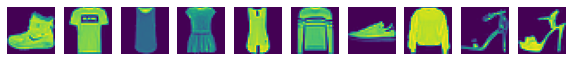

In [5]:
import matplotlib.pyplot as plt
fig,axs = plt.subplots(1, 10, figsize=(10, 10))
for i in range(10):
  axs[i].imshow(train_input[i])
  axs[i].axis('off')
plt.show()

In [6]:
from sklearn.model_selection import train_test_split
train_scaled = train_input / 255.0
train_scaled = train_scaled.reshape(-1, 28*28)
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, 
                                                                      test_size=0.2, random_state=42)

## 케라스 신경망
- 케라스에서 신경망을 추가한다.
- 입력층, 은닉층, 출력층이라고 부름

In [7]:
dense1 = keras.layers.Dense(100, activation='sigmoid', input_shape=(784,))
dense2 = keras.layers.Dense(10, activation='softmax')

In [8]:
model = keras.Sequential([dense1, dense2])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [10]:
model = keras.Sequential([
    keras.layers.Dense(100, activation='sigmoid', input_shape=(784,), 
                                             name='hidden'),
    keras.layers.Dense(10, activation='softmax', name='output')
    ], name='패션 MNIST 모델')

- 신경망을 추가할 때 이렇게 model.add로도 추가할 수 있다
- 활성화 함수를 지정해 주어야한다.

In [11]:
model = keras.Sequential()
model.add(keras.layers.Dense(100, activation='sigmoid', input_shape=(784,)))
model.add(keras.layers.Dense(10, activation='softmax'))

In [12]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 [==============================] - 7s 4ms/step - loss: 0.5715 - accuracy: 0.8056
Epoch 2/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4137 - accuracy: 0.8492
Epoch 3/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3790 - accuracy: 0.8629
Epoch 4/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3549 - accuracy: 0.8714
Epoch 5/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3376 - accuracy: 0.8797


- Flatten층을 추가하는 이유는 Flatten층이 이미지를 자동으로 펴주기 때문
- relu함수는 시그모이드보다 확실함 시그모이드는 입력 값이 높아질수록 출력값이 애매해지는 것을 보완함

In [13]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28, 28))) # Flatten층이 28X28 이미지를 자동으로 일차원배열로 펴줌
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [14]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 100)               78500     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [15]:
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()
train_scaled = train_input / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target,
                                                                      test_size=0.2, random_state=42)

In [16]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 [==============================] - 6s 3ms/step - loss: 0.5299 - accuracy: 0.8104
Epoch 2/5
1500/1500 [==============================] - 8s 5ms/step - loss: 0.3913 - accuracy: 0.8579
Epoch 3/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3545 - accuracy: 0.8727
Epoch 4/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3314 - accuracy: 0.8801
Epoch 5/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3194 - accuracy: 0.8837


In [17]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.3660 - accuracy: 0.8751


[0.36603671312332153, 0.875083327293396]

In [18]:
model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy',
              metrics='accuracy')


In [19]:
model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2630 - accuracy: 0.9056
Epoch 2/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2553 - accuracy: 0.9074
Epoch 3/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2514 - accuracy: 0.9088
Epoch 4/5
1500/1500 [==============================] - 5s 4ms/step - loss: 0.2487 - accuracy: 0.9097
Epoch 5/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2464 - accuracy: 0.9109


In [1]:
model.evaluate(val_scaled, val_target)

NameError: ignored

In [21]:
re = int(input())
mun = list(input())


7
70000000
['7', '0', '0', '0', '0', '0', '0', '0']
